<h1><center>Multiprocessing using Pools</center></h1>

A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 



<h1><center>Gus Boothman- 17350796</center></h1>



In [1]:
import time
import math
import multiprocessing
from multiprocessing import Pool

import psutil
import platform


#importing all functions
from matplotlib import pyplot as plt


from function import my_func, my_func_verbose

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete.
    timeResult = int(time.time()-tp1)
    return timeResult
    
#     print("Results", result)
    
#     print("Overall Time:", int(time.time()-tp1))
 

33


#### Type of Computer I am running the notebook on:

In [2]:
platform.processor()

'Intel64 Family 6 Model 142 Stepping 9, GenuineIntel'

#### Checking the number of logical CPUs: 

- Indicates how many cores the operating system can see and address

In [3]:
multiprocessing.cpu_count()


4

#### Number of usable CPUs:

In [4]:
len(psutil.Process().cpu_affinity())


4

#### Checking the number of physical CPUs:
- The reason the system indicates that it has less physical cores is that it might implement hyperthreading
- This hyperthreading technology developed by Intel improves CPU throughput by allowing more than one thread to run on a core.  


Ref: https://psutil.readthedocs.io/en/latest/#psutil.cpu_count

In [5]:
#physiscal cores
psutil.cpu_count(logical = False)


2

In [6]:
# def my_func(x):
#     s = math.sqrt(x)
#     return s

In [7]:
# This verbose version shows which process in the pool is running each task. 
# def my_func_verbose(x):
#     s = math.sqrt(x)
#     print("Task", multiprocessing.current_process(), x, s)
#     return s

In [8]:
dataRange = range(20)

Use the pool_process function to apply my_func to the data in dataRange.  
This task is so light it requires very little processing time. 

In [9]:
pool_process(my_func, dataRange, 2)

0

## A naive function for checking primes 

In [10]:
#importing the check_prime functions
from function import check_prime


In [11]:
# def check_prime(num):
#     t1 = time.time()
#     res = False
#     if num > 0:
#         # check for factors
#         for i in range(2,num):
#             if (num % i) == 0:
#                 print(num,"is not a prime number")
#                 print(i,"times",num//i,"is",num)
#                 print("Time:", int(time.time()-t1))
#                 break
#         else:
#             print(num,"is a prime number")
#             print("Time:", time.time()-t1) 
#             res = True
#             # if input number is less than
#             # or equal to 1, it is not prime
#     return res


In [12]:
check_prime(15488801)

15488801 is a prime number
Time: 2.826181650161743


True

In [13]:
check_prime(15488803)

15488803 is not a prime number
11 times 1408073 is 15488803
Time: 0


False

# Task 1

### Generating sets of work to be processed by the pool. 
- 8 digit prime numbers were used for each level. 
- The speedup will be quantified by using an increasing amount of cores.
- I run the all the algorithms and append the result to a list so they can easily be graphed.


### With 2 prime numbers:

In [20]:

time_list_twoPrime = []


data = [12281671, 12281693]
oneCore_2 = pool_process(check_prime, data, 1)
time_list_twoPrime.append(oneCore_2)

print(oneCore_2)


3


In [21]:
data = [12281671, 12281693]
twoCore_2=pool_process(check_prime, data, 2)
time_list_twoPrime.append(twoCore_2)

print(twoCore_2)


2


In [22]:
data = [12281671, 12281693]
threeCore_2 =pool_process(check_prime, data, 3)
time_list_twoPrime.append(threeCore_2)

print(threeCore_2)

2


In [23]:
data = [12281671, 12281693]
fourCore_2= pool_process(check_prime, data, 4)
time_list_twoPrime.append(fourCore_2)

print(fourCore_2)

2


### With 4 prime numbers

In [25]:
time_list_fourPrime = []


data = [12281671, 12281693, 12281707, 12281713]
oneCore_4= pool_process(check_prime, data, 1)
time_list_fourPrime.append(oneCore_4)

print(oneCore_4)


8


In [26]:
data = [12281671, 12281693, 12281707, 12281713]
twoCore_4=pool_process(check_prime, data, 2)
time_list_fourPrime.append(twoCore_4)

print(twoCore_4)

5


In [27]:
data = [12281671, 12281693, 12281707, 12281713]
threeCore_4= pool_process(check_prime, data, 3)
time_list_fourPrime.append(threeCore_4)

print(threeCore_4)

4


In [28]:
data = [12281671, 12281693, 12281707, 12281713]
fourCore_4=pool_process(check_prime, data, 4)
time_list_fourPrime.append(fourCore_4)


print(fourCore_4)

3


### With 8 prime numbers:

In [29]:
time_list_EightPrime = []

data = [12281671,12281693,12281707,12281713,12281719,12281729,12281767,12281813]
oneCore_8=pool_process(check_prime, data, 1)
time_list_EightPrime.append(oneCore_8)


print(oneCore_8)

17


In [30]:
data = [12281671,12281693,12281707,12281713,12281719,12281729,12281767,12281813]
twoCore_8=pool_process(check_prime, data, 2)
time_list_EightPrime.append(twoCore_8)

print(twoCore_8)

11


In [31]:
data = [12281671,12281693,12281707,12281713,12281719,12281729,12281767,12281813 ]
threeCore_8=pool_process(check_prime, data, 3)
time_list_EightPrime.append(threeCore_8)

print(threeCore_8)


9


In [32]:
data = [12281671,12281693,12281707,12281713,12281719,12281729,12281767,12281813 ]
fourCore_8=pool_process(check_prime, data, 4)
time_list_EightPrime.append(fourCore_8)


print(fourCore_8)

7


### With 16 prime numbers:

In [33]:
time_list_SixteenPrime = []

data = [12281671, 12281693, 12281707, 12281713, 12281719, 12281729, 12281767, 12281813, 12281827, 12281831, 12281881, 12281909, 12281947, 12281963, 12281981, 12281987]

oneCore_16=pool_process(check_prime, data, 1)
time_list_SixteenPrime.append(oneCore_16)

print(oneCore_16)

35


In [34]:
data = [12281671, 12281693, 12281707, 12281713, 12281719, 12281729, 12281767, 12281813, 12281827, 12281831, 12281881, 12281909, 12281947, 12281963, 12281981, 12281987]
twoCore_16=pool_process(check_prime, data, 2)
time_list_SixteenPrime.append(twoCore_16)

print(twoCore_16)

26


In [35]:
data = [12281671, 12281693, 12281707, 12281713, 12281719, 12281729, 12281767, 12281813, 12281827, 12281831, 12281881, 12281909, 12281947, 12281963, 12281981, 12281987]
threeCore_16=pool_process(check_prime, data, 3)
time_list_SixteenPrime.append(threeCore_16)

print(threeCore_16)

19


In [36]:
data = [12281671, 12281693, 12281707, 12281713, 12281719, 12281729, 12281767, 12281813, 12281827, 12281831, 12281881, 12281909, 12281947, 12281963, 12281981, 12281987]
fourCore_16=pool_process(check_prime, data, 4)
time_list_SixteenPrime.append(fourCore_16)

print(fourCore_16)

17


### Plotting result of Prime number check on graph

- Difference between 1 and 2 cores is quite large then levels off as the cores increase. 

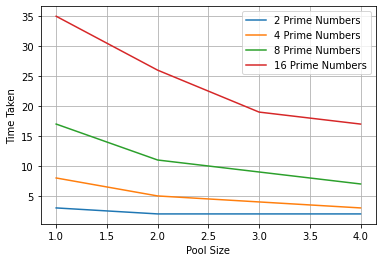

In [37]:
number_cores= [1,2,3,4]



plt.xlabel('Pool Size')
plt.ylabel('Time Taken')
plt.plot(number_cores,time_list_twoPrime, label ='2 Prime Numbers')
plt.plot(number_cores, time_list_fourPrime, label ='4 Prime Numbers')
plt.plot(number_cores, time_list_EightPrime, label ='8 Prime Numbers')
plt.plot(number_cores, time_list_SixteenPrime, label ='16 Prime Numbers')

plt.grid()
plt.legend()
plt.savefig("GraphofMultiprocessing")
plt.show()

In [38]:
TimesResult =[]

TimesResult.append(time_list_twoPrime)
TimesResult.append(time_list_fourPrime)
TimesResult.append(time_list_EightPrime)
TimesResult.append(time_list_SixteenPrime)

TimesResult


[[3, 2, 2, 2], [8, 5, 4, 3], [17, 11, 9, 7], [35, 26, 19, 17]]

### Bar chart looking at testing with 16 prime numbers

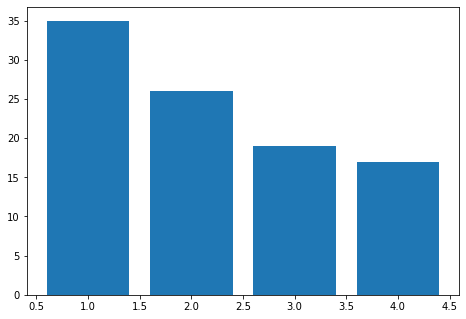

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(number_cores,time_list_SixteenPrime)
fig.savefig('BarChart.png')

plt.show()

# Task 2
- I have decided to implement an alternative processing task that will also test the CPU and the assessment is repeated.
- I have decided to implement a factorial summing algorithm as I tried to pick more of a serial algorithm.
- Meaning that it is implemented sequentially. As in the algorithm has to run once through, from start to finish, without other processing executing. As opposed to a parallel algorithm like the checkprime function which can do multiple operations at the same time.

In [42]:
#importing sum factorial
from function import sumFactorial


### Example of summing of factorials: 

- calculates the the factorials up to and including 4 and sums them. 

In [43]:
sumFactorial(4)

33

### Calculating with 2000

In [75]:
dataSearch = [2000]
time_list_factorial_one =[]
oneCore_factorial=pool_process(sumFactorial, dataSearch, 1)
time_list_factorial_one.append(oneCore_factorial)
pool_process(sumFactorial, dataSearch, 1)

1

In [76]:
dataSearch = [2000]
twoCore_factorial=pool_process(sumFactorial, dataSearch, 2)
time_list_factorial_one.append(twoCore_factorial)
pool_process(sumFactorial, dataSearch, 2)

1

In [77]:
# dataSearch = [500, 1000, 1500, 2000, 2500, 3000]

dataSearch = [2000]
threeCore_factorial=pool_process(sumFactorial, dataSearch, 3)
time_list_factorial_one.append(threeCore_factorial)
pool_process(sumFactorial, dataSearch, 3)

1

In [78]:
dataSearch = [2000]
fourCore_factorial=pool_process(sumFactorial, dataSearch, 4)
time_list_factorial_one.append(fourCore_factorial)
pool_process(sumFactorial, dataSearch, 4)

1

- All results above the same 

### Calculating with 2500

In [79]:
dataSearch = [2500]
time_list_factorial_two=[]
oneCore_factorial=pool_process(sumFactorial, dataSearch, 1)
time_list_factorial_two.append(oneCore_factorial)
pool_process(sumFactorial, dataSearch, 1)

2

In [80]:
dataSearch = [2500]
twoCore_factorial=pool_process(sumFactorial, dataSearch, 2)
time_list_factorial_two.append(twoCore_factorial)
pool_process(sumFactorial, dataSearch, 2)

2

In [81]:
dataSearch = [2500]
threeCore_factorial=pool_process(sumFactorial, dataSearch, 3)
time_list_factorial_two.append(threeCore_factorial)
pool_process(sumFactorial, dataSearch, 3)

2

In [82]:
dataSearch = [2500]
fourCore_factorial=pool_process(sumFactorial, dataSearch, 4)
time_list_factorial_two.append(fourCore_factorial)
pool_process(sumFactorial, dataSearch, 4)

2

- All results above the same 

### Calculating with 3000

In [83]:
dataSearch = [3000]
time_list_factorial_three =[]

threeCore_factorial=pool_process(sumFactorial, dataSearch, 1)
time_list_factorial_three.append(threeCore_factorial)
pool_process(sumFactorial, dataSearch, 1)

3

In [84]:
dataSearch = [3000]
threeCore_factorial=pool_process(sumFactorial, dataSearch, 2)
time_list_factorial_three.append(threeCore_factorial)
pool_process(sumFactorial, dataSearch, 2)

3

In [85]:
dataSearch = [3000]
threeCore_factorial=pool_process(sumFactorial, dataSearch, 3)
time_list_factorial_three.append(threeCore_factorial)
pool_process(sumFactorial, dataSearch, 3)

3

In [86]:
dataSearch = [3000]
threeCore_factorial=pool_process(sumFactorial, dataSearch, 4)
time_list_factorial_three.append(threeCore_factorial)
pool_process(sumFactorial, dataSearch, 4)

3

- All results above the same 

### Graphing the summing factorial function: 

- You can see all results are the same. Multiprocessing does not impact this type of algorithm. My theory is it is because it cannot be parallelised. 
- This is a stark contrast compared to the task 1 checkprime function. 

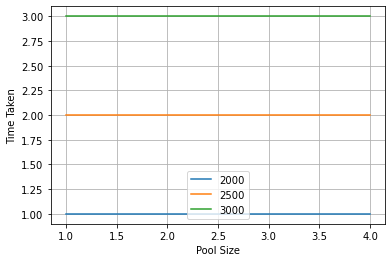

In [89]:
number_cores= [1,2,3,4]



plt.xlabel('Pool Size')
plt.ylabel('Time Taken')
plt.plot(number_cores,time_list_factorial_one, label ='2000')
plt.plot(number_cores, time_list_factorial_two, label ='2500')
plt.plot(number_cores, time_list_factorial_three, label ='3000')

plt.grid()
plt.legend()
plt.savefig("GraphofFactorialSumming")
plt.show()

### Bar chart comparing the input of 3000 for the differnt cores:

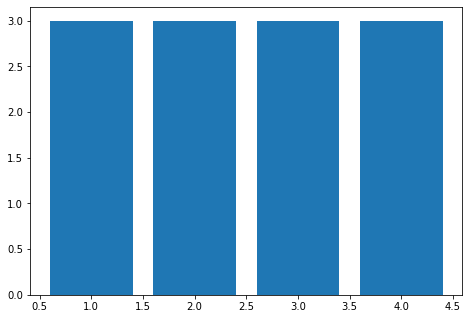

In [90]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(number_cores,time_list_factorial_three)
fig.savefig('BarChart_factorial.png')

plt.show()